### Exploratory data analysis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv("artifacts/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


## Relationship between Variables

### Sales Channel

In [7]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

print(f"Number of bookings done through internet: {df.sales_channel.value_counts().values[0]} which is {per_internet}%")
print(f"Number of bookings done through mobile: {df.sales_channel.value_counts().values[1]} which is {per_mobile} %")

Number of bookings done through internet: 44382 which is 88.764%
Number of bookings done through mobile: 5618 which is 11.236 %


Text(0.5, 1.0, 'Relationship between Sales Channels and Bookings')

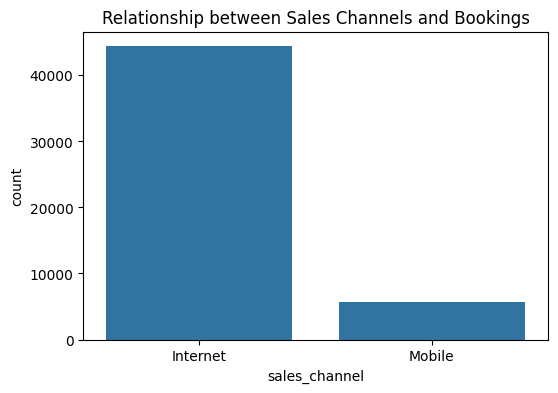

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='sales_channel', data=df)
plt.title("Relationship between Sales Channels and Bookings")

### Trip Type

In [9]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

print(f"Number of round trips: {df.trip_type.value_counts().values[0]}; Percentage: {per_round}%")
print(f"Number of one way trips: {df.trip_type.value_counts().values[1]}; Percentage: {per_oneway}%")
print(f"Number of circle trips: {df.trip_type.value_counts().values[2]}; Percentage: {per_circle}%")

Number of round trips: 49497; Percentage: 98.994%
Number of one way trips: 387; Percentage: 0.774%
Number of circle trips: 116; Percentage: 0.232%


Text(0.5, 1.0, 'Relationship between Trip Types and Bookings')

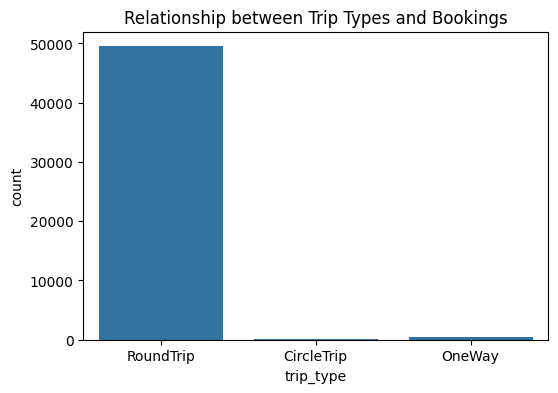

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='trip_type', data=df)
plt.title("Relationship between Trip Types and Bookings")


### Flight Day

Text(0.5, 1.0, 'Relationship between Flight Days and Bookings')

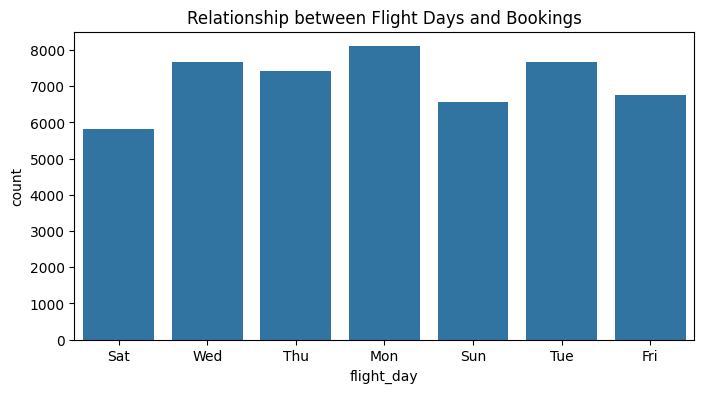

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='flight_day', data=df)
plt.title("Relationship between Flight Days and Bookings")


### Flight Duration

Text(0.5, 1.0, 'Relationship between Flight Duration and Bookings')

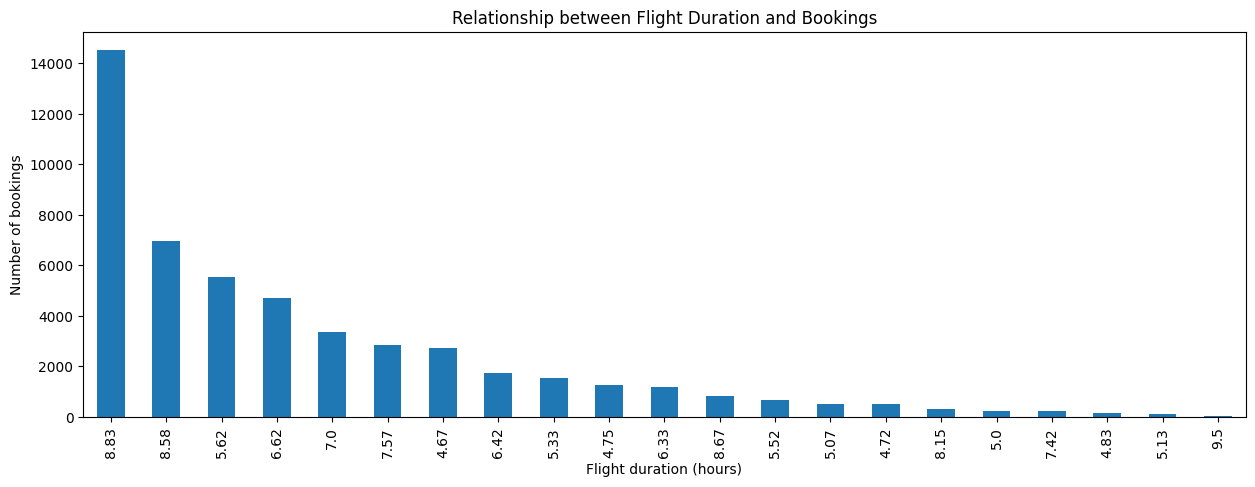

In [12]:
plt.figure(figsize=(15,5))
ax = df.flight_duration.value_counts().plot(kind="bar")
ax.set_xlabel("Flight duration (hours)")
ax.set_ylabel("Number of bookings")
ax.set_title("Relationship between Flight Duration and Bookings")

### Booking Origin

Text(0.5, 1.0, 'Relationship between Booking Origin and Bookings')

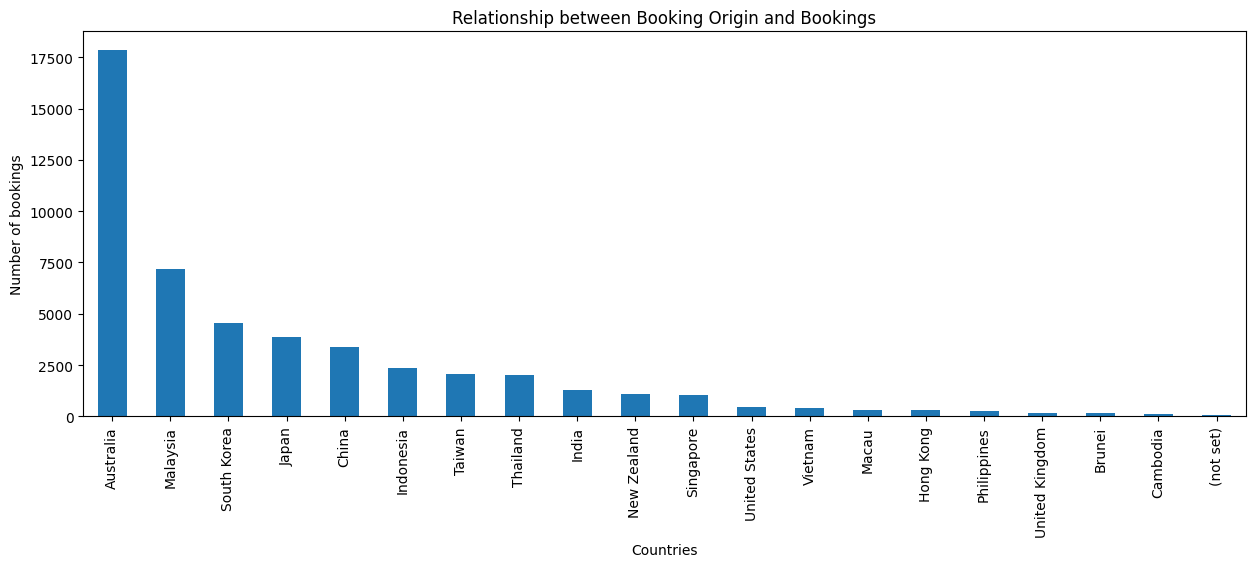

In [13]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")
ax.set_title("Relationship between Booking Origin and Bookings")

### Booking Origins with Complete Booking Applications

Text(0.5, 1.0, 'Relationship between Booking Origin and Complete Bookings')

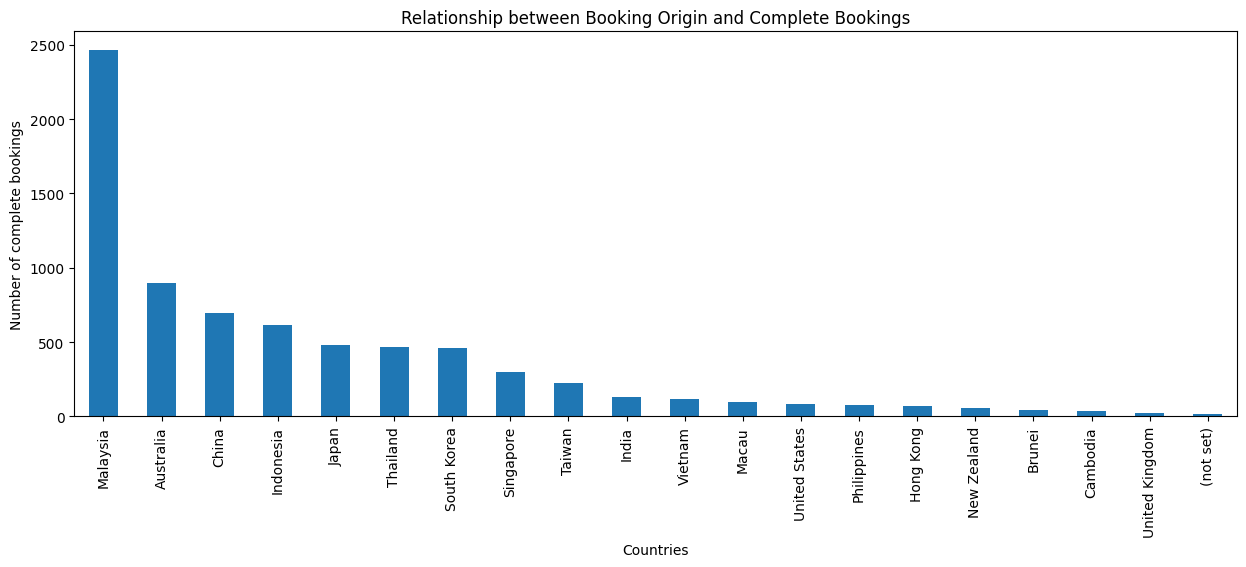

In [14]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")
ax.set_title("Relationship between Booking Origin and Complete Bookings")

## Outliers Handling

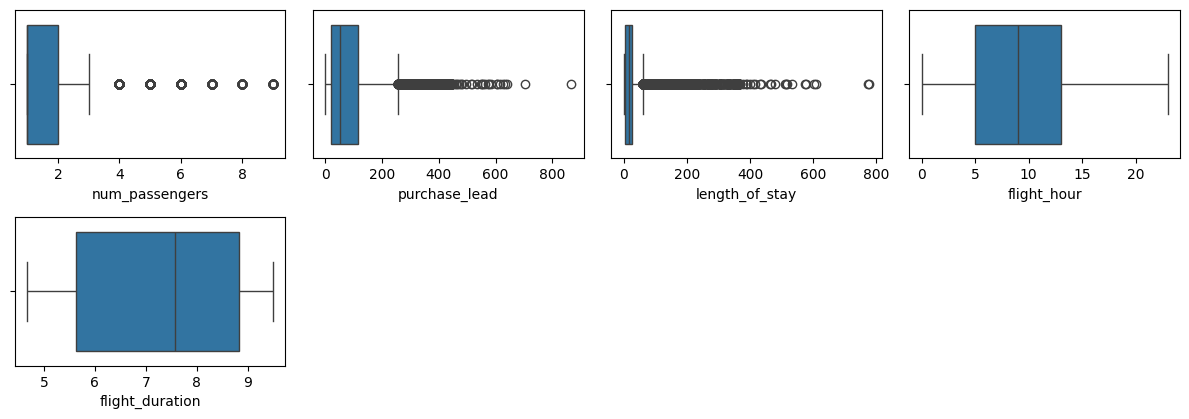

In [15]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

 "purchase lead" and "length of stay" have a lot of outliers. To delete outliers, we utilize zscore.

### Purchase Lead

<Axes: xlabel='purchase_lead', ylabel='Count'>

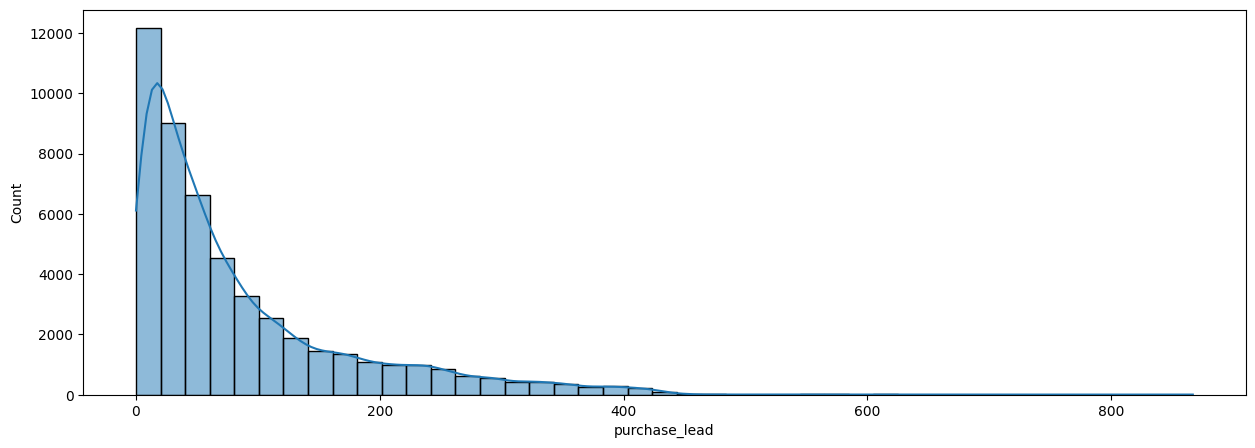

In [16]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True)

### Length of Stay

<Axes: xlabel='length_of_stay', ylabel='Count'>

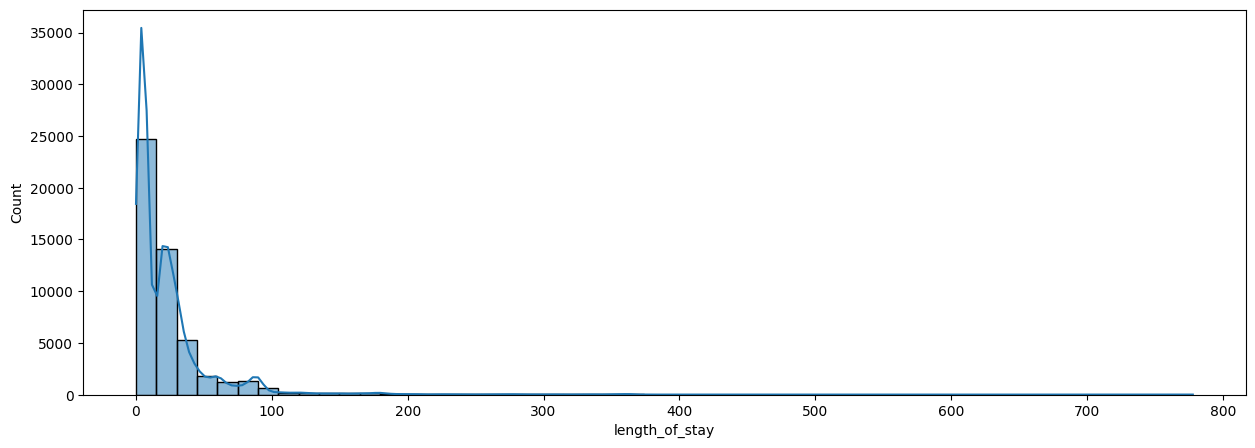

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

In [18]:
print(f'Total rows: {len(df)}')

# filtering the data to have only purchase lead days less than 500 days
df = df[df.purchase_lead < 500 ]
# filtering the data to have only length of stay days less than 200 days
df = df[df.length_of_stay < 200]
    
print(f'Total rows after outlier removal: {len(df)}')

Total rows: 50000
Total rows after outlier removal: 49699


### Complete Booking Applications

In [19]:
unsuccessful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100
successful_booking_per = 100 - unsuccessful_booking_per

print(f"Total Bookings: {len(df)}\nSuccessful/Completed Bookings: {round(successful_booking_per, 2)}%.")

Total Bookings: 49699
Successful/Completed Bookings: 14.95%.


Text(0.5, 1.0, 'Relationship between Booking Origin and Complete Bookings')

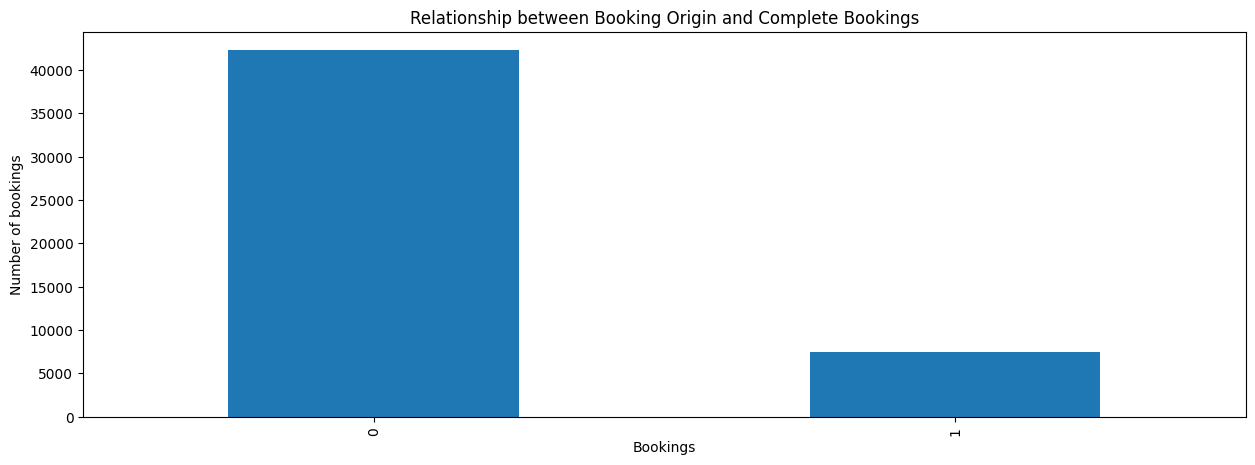

In [20]:
plt.figure(figsize=(15,5))
ax = df.booking_complete.value_counts().plot(kind="bar")
ax.set_xlabel("Bookings")
ax.set_ylabel("Number of bookings")
ax.set_title("Relationship between Booking Origin and Complete Bookings")

### From the analysis above, it can be seen that the target variable of the dataset is highly imbalanced.

## Export Filtered Data for Data Modeling

In [21]:
df.to_csv("artifacts/filtered_customer_booking.csv")